In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
se_df = pd.read_csv('https://grantmlong.com/data/streeteasy_rents_june2016.csv')

In [6]:
se_df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [7]:
se_df.shape

(5000, 20)

Text(0, 0.5, 'Count')

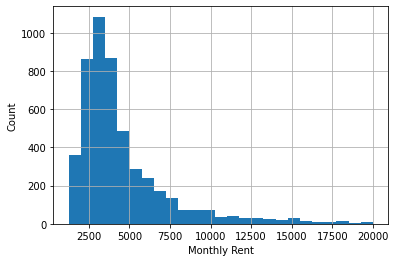

In [8]:
se_df.rent.hist(bins = 25)
plt.xlabel('Monthly Rent')
plt.ylabel('Count')

array([[<AxesSubplot:title={'center':'rent'}>]], dtype=object)

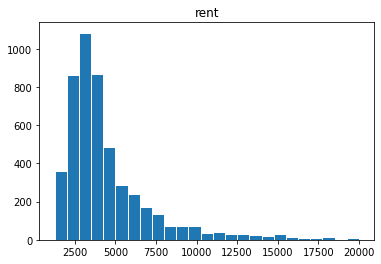

In [9]:
se_df.hist(['rent'],edgecolor = 'white',bins = 25, grid = False)

In [10]:
se_df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
print(list(se_df))
print()
se_df.describe()

['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket', 'borough']



,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
se_df.corr()['rent'].sort_values(ascending= False)[1:]

size_sqft           0.808784
bathrooms           0.733644
bedrooms            0.531200
floor               0.272351
has_elevator        0.120822
has_doorman         0.099106
has_dishwasher      0.096631
has_washer_dryer    0.096136
has_gym             0.093737
has_roofdeck        0.081286
has_patio           0.058260
min_to_subway       0.003652
building_id        -0.001235
no_fee             -0.091769
building_age_yrs   -0.122302
rental_id          -0.142801
Name: rent, dtype: float64

<AxesSubplot:xlabel='size_sqft', ylabel='rent'>

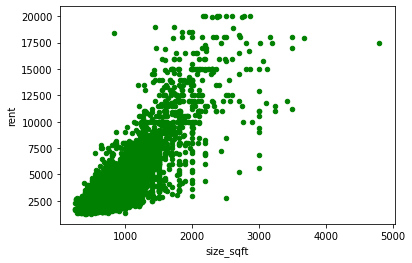

In [39]:
se_df.plot.scatter('size_sqft','rent',color = "green")

<AxesSubplot:xlabel='bathrooms', ylabel='rent'>

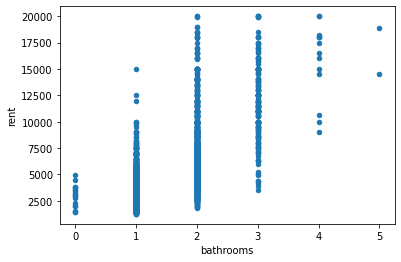

In [14]:
se_df.plot.scatter('bathrooms','rent')

<AxesSubplot:xlabel='floor', ylabel='rent'>

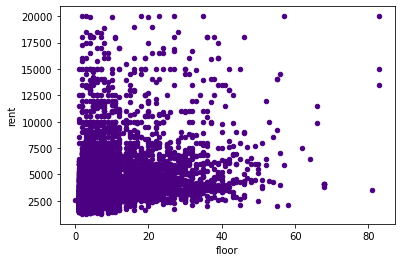

In [41]:
se_df.plot.scatter('floor','rent',color='indigo')

In [16]:
beta, alpha = np.polyfit(se_df.size_sqft,se_df.rent,1)
print('bet: %0.3f, alpha: %0.1f.'%(beta,alpha))
print()

bet: 5.384, alpha: -416.6.



In [17]:
print('Based on this analysis a 700 square foot apartment would rent for $%0.2f' % (beta * 700 + alpha)) 

Based on this analysis a 700 square foot apartment would rent for $3351.98


Text(0.5, 1.0, '')

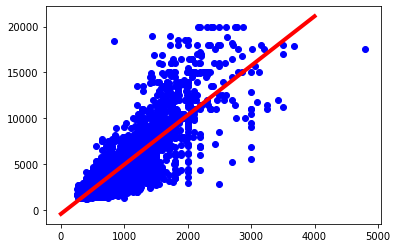

In [43]:
plt.plot(se_df.size_sqft, se_df.rent, color = 'blue',marker ='.',markersize = 12, linestyle = 'none')
plt.plot([0,4000],[alpha,alpha+beta*4000],color = 'red', linewidth = 4)
plt.title('')

In [19]:
se_df['rent_predicted'] = se_df['rent']*beta+alpha
se_df['rent_residual'] = se_df['rent_predicted']-se_df['rent']

array([[<AxesSubplot:title={'center':'rent_residual'}>]], dtype=object)

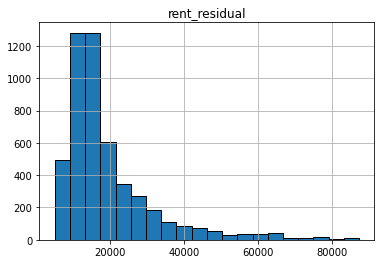

In [49]:
se_df.hist(['rent_residual'],bins=20,edgecolor = 'black')

In [21]:
LR = LinearRegression()

In [22]:
se_df.columns

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough', 'rent_predicted', 'rent_residual'],
      dtype='object')

In [23]:
dv=['bedrooms','bathrooms','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_elevator','has_doorman','has_dishwasher','has_patio','has_gym']

In [24]:
a = se_df[dv]
LR.fit(a,se_df.rent)

LinearRegression()

In [25]:
print('Estimated intercept coeff.:', LR.intercept_)
print('Number of coeff.:',len(LR.coef_))

Estimated intercept coeff.: -515.504036081129
Number of coeff.: 13


In [26]:
pd.DataFrame(LR.coef_,index=dv,columns=['Estimated coefficients'])

,Estimated coefficients
bedrooms,417.730687
bathrooms,3171.816130
min_to_subway,-22.630204
floor,49.132507
building_age_yrs,-1.488370
no_fee,-344.120712
has_roofdeck,-4.475219
has_washer_dryer,191.475476
has_elevator,400.797299
has_doorman,-41.004582


In [27]:
se_df['Predicted_value']=LR.predict(a)

In [28]:
se_df[['rent','Predicted_value']]

,rent,Predicted_value
0,2550,2629.064883
1,11500,6479.317777
2,3000,3710.348635
3,4500,5994.052572
4,4795,3764.126005
...,...,...
4995,2650,2718.315156
4996,6675,7282.301113
4997,1699,2713.830709
4998,3475,3421.494926


Text(0, 0.5, 'frequency')

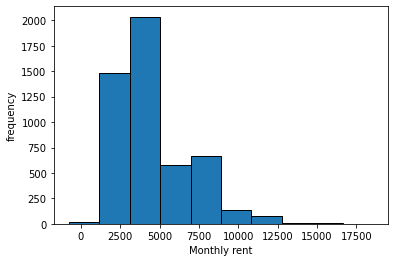

In [29]:
plt.hist(se_df['Predicted_value'],edgecolor='black')
plt.xlabel('Monthly rent')
plt.ylabel('frequency')

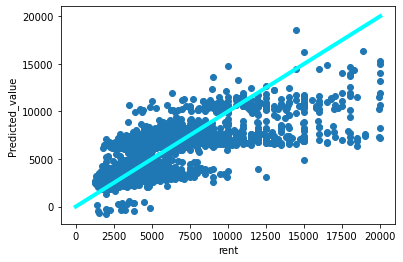

In [30]:
plt.scatter(se_df['rent'],se_df['Predicted_value'])
plt.xlabel("rent")
plt.ylabel("Predicted_value")
plt.plot([0,20000],[0,20000],linewidth=4,color='cyan')

In [33]:
print('residual sum of squares',np.sum(se_df['rent']-LR.predict(a))**2)

residual sum of squares 4.393565191363976e-17
